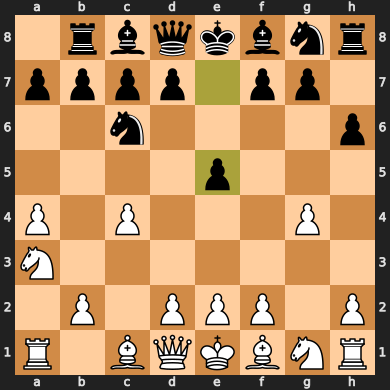

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import chess

from env import *
env = Chess_env()
obs = env.reset()

from deepQ import *


env.board

f8c5
d2d4


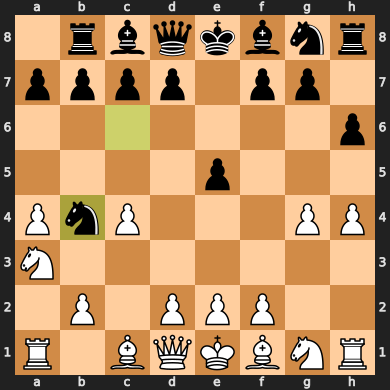

In [2]:
for step in range(2):
    action = np.random.choice(list(env.board.legal_moves))
    _,_,done,_ = env.step(action)
        

    stockfish.set_fen_position(env.board.fen())
    print(stockfish.get_best_move())

env.board

In [3]:
list(env.board.legal_moves)[10:]

[Move.from_uci('d1c2'),
 Move.from_uci('a1a2'),
 Move.from_uci('a1b1'),
 Move.from_uci('h4h5'),
 Move.from_uci('g4g5'),
 Move.from_uci('c4c5'),
 Move.from_uci('a4a5'),
 Move.from_uci('f2f3'),
 Move.from_uci('e2e3'),
 Move.from_uci('d2d3'),
 Move.from_uci('b2b3'),
 Move.from_uci('f2f4'),
 Move.from_uci('e2e4'),
 Move.from_uci('d2d4')]

In [7]:
model = DeepQ(env, dropout_rate=0.2, n_channels=128, n_residual=1)
model.model.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 8, 8, 16)]   0                                            
__________________________________________________________________________________________________
model_4 (Functional)            (None, 8, 8, 128)    315264      input_8[0][0]                    
__________________________________________________________________________________________________
conv2d_23 (Conv2D)              (None, 8, 8, 1)      129         model_4[0][0]                    
__________________________________________________________________________________________________
dropout_19 (Dropout)            (None, 8, 8, 1)      0           conv2d_23[0][0]                  
____________________________________________________________________________________________

In [5]:
model.model = keras.models.load_model('pretrained')
model.target_model = keras.models.load_model('pretrained')

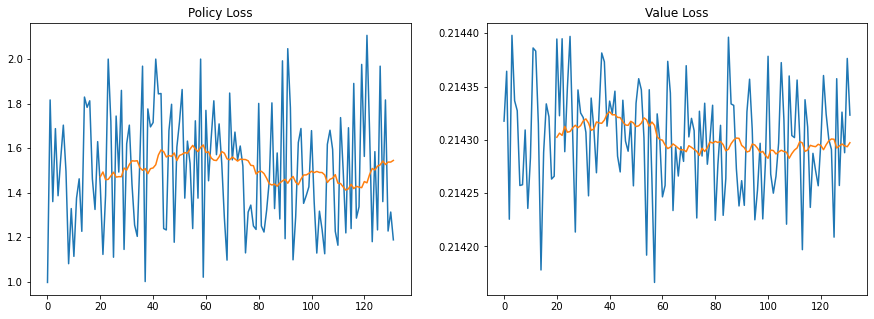

Batch : 1/32


 66%|██████▌   | 49/74 [00:02<00:01, 21.93it/s]


Lost
Batch : 2/32


 39%|███▉      | 29/74 [00:01<00:01, 28.06it/s]


Lost
Batch : 3/32


 39%|███▉      | 29/74 [00:01<00:01, 25.91it/s]


Lost
Batch : 4/32


 64%|██████▎   | 47/74 [00:01<00:00, 43.48it/s]


Won
Batch : 5/32


  8%|▊         | 6/74 [00:00<00:02, 27.64it/s]


Lost
Batch : 6/32


100%|██████████| 74/74 [00:01<00:00, 45.65it/s]


Batch : 7/32


 80%|███████▉  | 59/74 [00:01<00:00, 41.37it/s]


Lost
Batch : 8/32


 46%|████▌     | 34/74 [00:01<00:01, 25.82it/s]


Lost
Batch : 9/32


 26%|██▌       | 19/74 [00:00<00:01, 28.27it/s]


Lost
Batch : 10/32


 39%|███▉      | 29/74 [00:00<00:01, 42.52it/s]


Lost
Batch : 11/32


 53%|█████▎    | 39/74 [00:01<00:00, 35.26it/s]


Lost
Batch : 12/32


 74%|███████▍  | 55/74 [00:01<00:00, 45.56it/s]


Won
Batch : 13/32


 27%|██▋       | 20/74 [00:00<00:01, 35.15it/s]


Lost
Batch : 14/32


 78%|███████▊  | 58/74 [00:01<00:00, 42.27it/s]


Lost
Batch : 15/32


 50%|█████     | 37/74 [00:00<00:00, 38.46it/s]


Lost
Batch : 16/32


100%|██████████| 74/74 [00:01<00:00, 40.59it/s]


Batch : 17/32


 58%|█████▊    | 43/74 [00:00<00:00, 45.45it/s]


Won
Batch : 18/32


 80%|███████▉  | 59/74 [00:01<00:00, 43.87it/s]


Lost
Batch : 19/32


 32%|███▏      | 24/74 [00:00<00:01, 40.40it/s]


Lost
Batch : 20/32


 80%|███████▉  | 59/74 [00:01<00:00, 37.72it/s]


Lost
Batch : 21/32


 49%|████▊     | 36/74 [00:00<00:00, 44.50it/s]


Won
Batch : 22/32


 58%|█████▊    | 43/74 [00:01<00:00, 36.04it/s]


Won
Batch : 23/32


 45%|████▍     | 33/74 [00:00<00:01, 35.22it/s]


KeyboardInterrupt: 

In [8]:
model.pre_train(
            max_epoch= 200*32, 
            batch_size = 32,
            max_steps_per_episode = 75, 
            learning_rate = 1-2,
            update_target = 1000000000000000,
            jupyter=True,
            random_best_action=0.9,
            n_top_move= 1000, 
            name='pretrained'
        )

In [10]:
np.mean(np.array([model.loss_q_history[i:-20+i] for i in range(20)]), axis = 0)

array([1.824885], dtype=float32)

In [8]:
np.arange(len(model.loss_q_history))[20:],

(array([20]),)

In [9]:
np.mean(
    np.array([[model.loss_q_history[i:20-i]] for i in range(20)]),
    axis = 1
    )


TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [ ]:
from stockfish import Stockfish

stockfish = Stockfish(path="C:/Users/Philippe/Downloads/stockfish_13_win_x64_avx2/stockfish_13_win_x64_avx2")



stockfish.set_fen_position(env.board.fen())
[s['Move'] for s in stockfish.get_top_moves(3)]

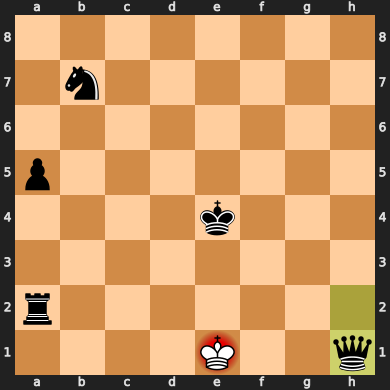

In [36]:
env.board

In [7]:
%%time
model.predict_move_to_play_MCTS(2, env,100)

Wall time: 386 ms


'e2e4'

In [12]:
import warnings
warnings.filterwarnings('ignore')

model.train(
    max_epoch = 3000, 
    epsilon_random_frames = 0,
    epsilon_greedy_frames = 5,
    epsilon = 0.01,
    epsilon_min = 0.,
    batch_size = 32,
    max_steps_per_episode = 150,
    learning_rate=1e-3,
    MCTS_depth=2,
    MCTS_iterations=400,
    name='model_long_training',
    update_target=16*2
    )

Batch : 1/32


 24%|██▍       | 36/149 [01:31<04:48,  2.55s/it]


Won
Batch : 2/32


100%|██████████| 149/149 [05:04<00:00,  2.04s/it]


Batch : 3/32


100%|██████████| 149/149 [05:08<00:00,  2.07s/it]


Batch : 4/32


100%|██████████| 149/149 [04:57<00:00,  2.00s/it]


Batch : 5/32


100%|██████████| 149/149 [05:12<00:00,  2.10s/it]


Batch : 6/32


100%|██████████| 149/149 [05:23<00:00,  2.17s/it]


Batch : 7/32


 34%|███▎      | 50/149 [02:06<04:10,  2.53s/it]


Won
Batch : 8/32


100%|██████████| 149/149 [05:01<00:00,  2.02s/it]


Batch : 9/32


100%|██████████| 149/149 [05:18<00:00,  2.14s/it]


Batch : 10/32


100%|██████████| 149/149 [05:00<00:00,  2.01s/it]


Batch : 11/32


100%|██████████| 149/149 [05:02<00:00,  2.03s/it]


Batch : 12/32


 86%|████████▌ | 128/149 [04:08<00:40,  1.94s/it]


Won
Batch : 13/32


 21%|██▏       | 32/149 [01:20<04:55,  2.52s/it]


Won
Batch : 14/32


100%|██████████| 149/149 [05:02<00:00,  2.03s/it]


Batch : 15/32


 74%|███████▍  | 111/149 [03:42<01:16,  2.00s/it]


Won
Batch : 16/32


 72%|███████▏  | 107/149 [04:01<01:34,  2.26s/it]


Won
Batch : 17/32


 13%|█▎        | 19/149 [00:53<06:04,  2.81s/it]


Won
Batch : 18/32


 86%|████████▌ | 128/149 [05:01<00:49,  2.36s/it]


Won
Batch : 19/32


100%|██████████| 149/149 [05:02<00:00,  2.03s/it]


Batch : 20/32


 52%|█████▏    | 78/149 [03:07<02:50,  2.41s/it]


Won
Batch : 21/32


 22%|██▏       | 33/149 [01:26<05:04,  2.63s/it]


Won
Batch : 22/32


 26%|██▌       | 39/149 [01:38<04:36,  2.52s/it]


Won
Batch : 23/32


100%|██████████| 149/149 [05:01<00:00,  2.02s/it]


Batch : 24/32


100%|██████████| 149/149 [05:01<00:00,  2.03s/it]


Batch : 25/32


 19%|█▉        | 28/149 [01:16<05:29,  2.72s/it]


Won
Batch : 26/32


100%|██████████| 149/149 [04:44<00:00,  1.91s/it]


Batch : 27/32


 35%|███▍      | 52/149 [02:06<03:56,  2.44s/it]


Won
Batch : 28/32


 19%|█▉        | 28/149 [01:12<05:44,  2.85s/it]

In [9]:
_ = env.reset()
 
for i in tqdm(range(150)):

    if i%2 ==0:
        action = model.predict_move_to_play_MCTS(2,env,20)
    else:
        action = model.predict_move_to_play_MCTS(2,env,20, white=False)

    _,_,done,_ = env.step(action)


    if done:
        print(i%2*2-1)
        break
    env.board

  0%|          | 0/150 [00:02<?, ?it/s]


KeyboardInterrupt: 

In [11]:
_=env.reset()

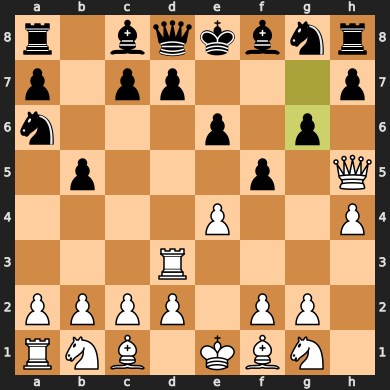

In [12]:
env.board

In [13]:
model.predict_move_to_play_MCTS(2,env,10)

AttributeError: partially initialized module 'pandas' has no attribute 'core' (most likely due to a circular import)

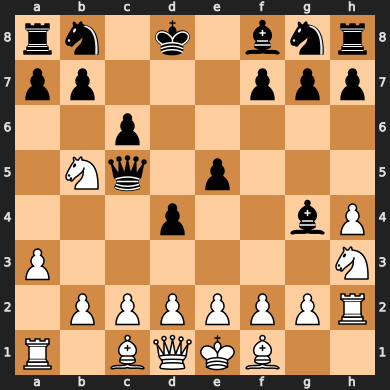

In [15]:
fen_mirror = reverse_fen(env.board.fen()).split(' ')
fen_mirror[1] = 'w'
fen_mirror = fen_mirror[0] + ' ' + fen_mirror[1] + ' ' + fen_mirror[2] + ' ' + fen_mirror[3] + ' ' + fen_mirror[4] + ' ' + fen_mirror[5] + ' ' 

env_mirror = Chess_env(fen_mirror)
env_mirror.board

In [14]:
model.predict_move_to_play_MCTS(2,env,10, white=False)

AttributeError: partially initialized module 'pandas' has no attribute 'core' (most likely due to a circular import)